In [2]:
include("src/JuliaPhonons.jl")
using JuliaPhonons
using PyPlot

In [5]:
poscar_neutral = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/neutral_POSCAR"))
poscar_negative = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/negative_POSCAR"))
phonons_neutral = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/neutral_mesh.yaml"),poscar_neutral)
phonons_negative = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/negative_mesh.yaml"),poscar_negative)


[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N", "N", "N", "N", "N", "N", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I"]
supercellexpansions ==>Array{Float64,1}[[0.0, 0.0, 0.0]]
[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N

(Any[[0.0295856 -0.0357804 0.0132983; 0.0298501 -0.0359258 0.0136408; … ; 0.0962323 -0.117106 0.043828; 0.0962382 -0.116914 0.0456438], [0.016442 0.0275918 0.0364581; 0.0164723 0.0275497 0.0364279; … ; 0.0540134 0.0896803 0.118267; 0.054125 0.089651 0.118462], [0.0347007 0.0175664 -0.0290669; 0.0347265 0.0175828 -0.0292186; … ; 0.113067 0.0569578 -0.094388; 0.113058 0.0569159 -0.0944499], [-0.0223523 -0.0235597 0.000910907; -0.0136128 -0.015645 0.0413655; … ; -0.0274621 0.0505526 -0.0728979; 0.000746735 0.0259993 0.0102076], [-0.00642863 0.0365534 0.0283027; -0.00853109 -0.0144427 -0.0171581; … ; 0.0223064 -0.00867779 -0.0198539; 0.0381864 0.000521586 0.331415], [-0.0229039 -0.00815617 0.0111612; 0.00475894 0.00918921 -0.000793227; … ; 0.0841561 -0.00800914 0.116315; 0.0915316 0.000347784 -0.0207839], [-0.0248397 -0.00162594 0.0609371; 0.00784605 -0.00257302 -0.0129772; … ; 0.00254378 -0.203703 -0.105275; -0.000635289 -0.037887 -0.00375822], [-0.0219231 -0.0181482 0.00988558; -0.015232

In [7]:
displacement = poscar_negative.positions - poscar_neutral.positions

projections = []
for eigenvector in phonons_negative[1]
    push!(projections,dot(displacement,eigenvector))
end

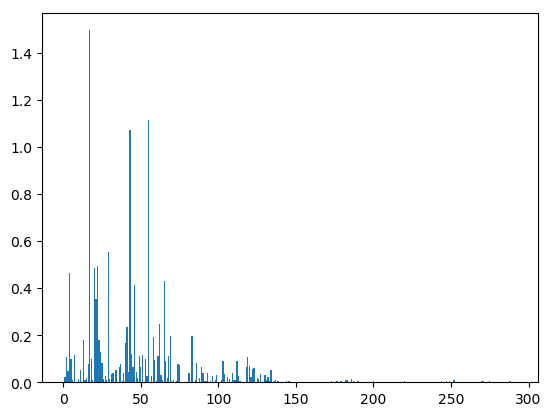

(PyObject <matplotlib.patches.Rectangle object at 0x13108b9d0>, PyObject <matplotlib.patches.Rectangle object at 0x13108b2d0>, PyObject <matplotlib.patches.Rectangle object at 0x13108bf50>, PyObject <matplotlib.patches.Rectangle object at 0x13108b490>, PyObject <matplotlib.patches.Rectangle object at 0x110330310>, PyObject <matplotlib.patches.Rectangle object at 0x110330690>, PyObject <matplotlib.patches.Rectangle object at 0x110330a10>, PyObject <matplotlib.patches.Rectangle object at 0x110330d90>, PyObject <matplotlib.patches.Rectangle object at 0x1354f5150>, PyObject <matplotlib.patches.Rectangle object at 0x1354f54d0>, PyObject <matplotlib.patches.Rectangle object at 0x1354f5850>, PyObject <matplotlib.patches.Rectangle object at 0x1354f5bd0>, PyObject <matplotlib.patches.Rectangle object at 0x1354f5f50>, PyObject <matplotlib.patches.Rectangle object at 0x1354df310>, PyObject <matplotlib.patches.Rectangle object at 0x1354df690>, PyObject <matplotlib.patches.Rectangle object at 0x135

In [9]:
PyPlot.bar(1:3*poscar_negative.natoms,projections.*projections)

In [21]:
distribution_function = []
for neut_mode in phonons_neutral[1]
    for neg_mode in phonons_negative[1]
    push!(distribution_function,dot(neut_mode,neg_mode).*dot(neut_mode,neg_mode))
    end
end

BoundsError: [91mBoundsError: attempt to access "distri"
  at index [0][39m

In [29]:
distribution_function = reshape(distribution_function,3*poscar_negative.natoms,3*poscar_neutral.natoms)

291×291 Array{Any,2}:
 2.67578e-7   0.364643     6.49538e-5   …  7.14937e-11  1.65079e-12
 9.24254e-9   0.46886      0.267407        8.72513e-11  3.14329e-10
 3.61811e-8   0.166485     0.732525        6.77958e-12  5.52118e-11
 0.0292077    6.69461e-7   1.50492e-9      4.05006e-7   0.00016245 
 0.0109813    8.41929e-7   8.08201e-7      4.36769e-5   2.4063e-7  
 0.00219297   2.42571e-7   8.77881e-7   …  8.37067e-6   1.8654e-5  
 0.00884892   6.65466e-7   6.48152e-9      1.41476e-5   2.29365e-5 
 0.00506396   3.6485e-8    5.70195e-11     2.86278e-5   6.83268e-5 
 0.010684     7.33569e-9   8.17341e-9      2.84863e-5   1.5066e-7  
 0.000399789  2.45739e-10  4.78504e-8      8.68955e-6   3.40406e-7 
 5.99814e-5   1.18147e-8   1.07367e-7   …  4.62962e-6   4.18371e-6 
 9.1087e-5    4.04304e-7   5.29486e-8      1.37814e-5   3.77568e-6 
 9.23825e-7   3.50915e-11  1.37067e-8      2.9603e-6    2.09921e-5 
 ⋮                                      ⋱               ⋮          
 5.40418e-8   9.68842e-12 

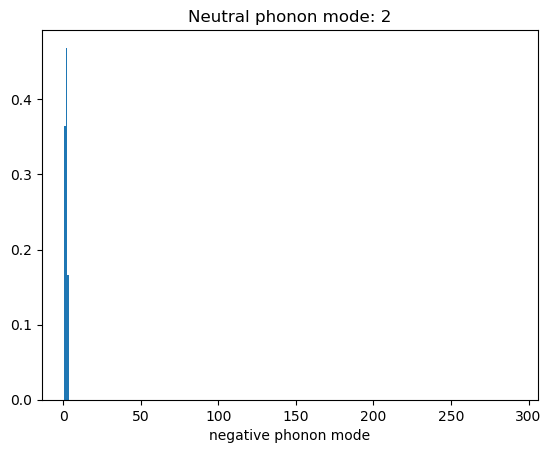

PyObject Text(0.5,1,'Neutral phonon mode: 2')

In [81]:
i=2
PyPlot.bar(1:3*poscar_negative.natoms,distribution_function[:,i])
PyPlot.xlabel("negative phonon mode")
PyPlot.title(string("Neutral phonon mode: ",i))

In [89]:
PyPlot.bar3D(1:3*poscar_negative.natoms,1:3*poscar_neutral.natoms,[0]*3*poscar_neutral.natoms,[0.01]*3*poscar_neutral.natomsdistribution_function,)

LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, C_NULL)) <type 'exceptions.TypeError'>
TypeError('bar3d() takes at least 7 arguments (4 given)',)
[39m

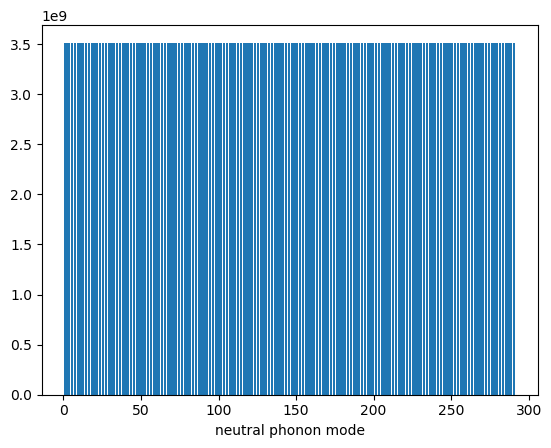

PyObject Text(0.5,24,'neutral phonon mode')

In [80]:
g = []
for i in poscar_neutral.natoms
    push!(g,maximum(1 ./ distribution_function[:,i]))
    end
PyPlot.bar(1:3*poscar_neutral.natoms,g)
PyPlot.xlabel("neutral phonon mode")

In [78]:
maximum(1 ./ distribution_function[:,i])

3.5143125031744847e9